<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [37]:
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd
import patsy

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
# Load  San Francisco assessor dataset
sf_acc_df = pd.read_csv('~/Desktop/DSI-SF-5/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2014_2015.csv')



/Users/howardjai/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print sf_acc_df.shape
print
print sf_acc_df.dtypes
print
print sf_acc_df.isnull().sum()
print
print sf_acc_df.columns

(206816, 41)

PROPLOC        object
RP1NBRCDE      object
RP1PRCLID      object
BASELOT         int64
BASELOTSFX     object
RP1VOLUME       int64
RP1CLACDE      object
YRBLT           int64
BATHS           int64
BEDS            int64
ROOMS           int64
STOREYNO        int64
UNITS           int64
CHGDATE         int64
REMARKFLA      object
KITCHEN        object
BUILTIN         int64
ZONE           object
CONSTTYPE      object
DEPTH         float64
FRONT         float64
SQFT            int64
FBA             int64
LAREA         float64
LOTCODE        object
REPRISDATE    float64
RP1RECDAT1      int64
RP1DOCNO1      object
RP1DOCNO2       int64
RP1TRACDE     float64
OWNRPRCNT     float64
EXEMPTYPE      object
RP1STACDE      object
RP1EXMVL2       int64
RP1EXMVL1       int64
ROLLYEAR        int64
RECURRSALD      int64
RP1FXTVAL       int64
RP1IMPVAL       int64
RP1LNDVAL       int64
RP1PPTVAL       int64
dtype: object

PROPLOC            0
RP1NBRCDE         85
RP1PRCLID          0
BASELO

In [4]:
sf_acc_df.head(3)

,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
2,0000 0000 0000,08H,0004 002,0,NaN,1,VCI,0,0,0,...,NaN,N,0,0,14,0,0,0,0,0


In [5]:
# initialize the new feature value = value = u'RP1FXTVAL', u'RP1IMPVAL', u'RP1LNDVAL', u'RP1PPTVAL'
value_cols = ['RP1FXTVAL', 'RP1IMPVAL', 'RP1LNDVAL', 'RP1PPTVAL']
sf_acc_df['value'] = sf_acc_df[value_cols].apply(lambda x: np.sum(x), axis=1)

sf_acc_df.head()




,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL,value
0,0000 0000 0000,08H,0001 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,0
2,0000 0000 0000,08H,0004 002,0,NaN,1,VCI,0,0,0,...,N,0,0,14,0,0,0,0,0,0
3,0000 0000 0000,08H,0005 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,0
4,0000 0000 0000,08H,0006 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,0


In [6]:
sf_acc_df.tail()

,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL,value
206811,0000 0000 0000,NaN,9999 192,0,NaN,45,NaN,0,0,0,...,S,0,0,14,140101,0,0,0,713362,713362
206812,0000 0000 0000,NaN,9999 193,0,NaN,45,NaN,0,0,0,...,S,0,0,14,140101,0,3074178,0,0,3074178
206813,0000 0000 0000,NaN,9999 194,0,NaN,45,NaN,0,0,0,...,S,0,0,14,140101,0,0,0,6855,6855
206814,0000 0000 0000,NaN,9999 195,0,NaN,45,NaN,0,0,0,...,S,0,0,14,140101,0,0,0,37393,37393
206815,0000 0000 0000,NaN,9999 196,0,NaN,45,NaN,0,0,0,...,S,0,0,14,140101,0,0,0,17007,17007


In [8]:
# show columns:
sf_acc_df.columns


Index([u'PROPLOC', u'RP1NBRCDE', u'RP1PRCLID', u'BASELOT', u'BASELOTSFX',
       u'RP1VOLUME', u'RP1CLACDE', u'YRBLT', u'BATHS', u'BEDS', u'ROOMS',
       u'STOREYNO', u'UNITS', u'CHGDATE', u'REMARKFLA', u'KITCHEN', u'BUILTIN',
       u'ZONE', u'CONSTTYPE', u'DEPTH', u'FRONT', u'SQFT', u'FBA', u'LAREA',
       u'LOTCODE', u'REPRISDATE', u'RP1RECDAT1', u'RP1DOCNO1', u'RP1DOCNO2',
       u'RP1TRACDE', u'OWNRPRCNT', u'EXEMPTYPE', u'RP1STACDE', u'RP1EXMVL2',
       u'RP1EXMVL1', u'ROLLYEAR', u'RECURRSALD', u'RP1FXTVAL', u'RP1IMPVAL',
       u'RP1LNDVAL', u'RP1PPTVAL', u'value'],
      dtype='object')

In [19]:
# keep only these columns:
# [ u'BASELOT', u'RP1VOLUME',
#   u'YRBLT', u'BATHS', u'BEDS', u'ROOMS',
#   u'STOREYNO', u'DEPTH', u'FRONT',
#   u'SQFT', u'FBA',u'OWNRPRCNT',  u'ROLLYEAR',  
#   u'value']
subset_cols = [ u'BASELOT', u'RP1VOLUME',  
               u'YRBLT', u'BATHS', u'BEDS', u'ROOMS', 
               u'STOREYNO',  u'DEPTH', u'FRONT',
               u'SQFT', u'FBA',u'OWNRPRCNT',  u'ROLLYEAR',  u'value']
sf_acc_df2 = sf_acc_df[subset_cols]

In [20]:
sf_acc_df2.head(10)

,BASELOT,RP1VOLUME,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,DEPTH,FRONT,SQFT,FBA,OWNRPRCNT,ROLLYEAR,value
0,0,1,1900,0,0,0,0,0.0,0.0,0,0,1.0,14,0
1,0,1,1900,0,0,0,0,0.0,0.0,0,0,1.0,14,0
2,0,1,0,0,0,0,0,0.0,0.0,0,0,1.0,14,0
3,0,1,1900,0,0,0,0,0.0,0.0,0,0,1.0,14,0
4,0,1,1900,0,0,0,0,0.0,0.0,0,0,1.0,14,0
5,0,1,1900,0,0,0,0,75.0,0.0,0,0,1.0,14,0
6,0,1,1907,0,0,0,3,0.0,0.0,133675,0,1.0,14,21508638
7,0,1,1907,0,0,0,4,0.0,0.0,0,0,1.0,14,1
8,0,1,0,0,0,0,0,75.0,0.0,0,0,1.0,14,66231488
9,0,1,1974,7,0,36,4,75.0,0.0,198525,0,1.0,14,46734490


In [21]:
print sf_acc_df2.shape
print
print sf_acc_df2.dtypes
print
print sf_acc_df2.isnull().sum()
print
print sf_acc_df2.columns

(206816, 14)

BASELOT        int64
RP1VOLUME      int64
YRBLT          int64
BATHS          int64
BEDS           int64
ROOMS          int64
STOREYNO       int64
DEPTH        float64
FRONT        float64
SQFT           int64
FBA            int64
OWNRPRCNT    float64
ROLLYEAR       int64
value          int64
dtype: object

BASELOT      0
RP1VOLUME    0
YRBLT        0
BATHS        0
BEDS         0
ROOMS        0
STOREYNO     0
DEPTH        0
FRONT        0
SQFT         0
FBA          0
OWNRPRCNT    0
ROLLYEAR     0
value        0
dtype: int64

Index([u'BASELOT', u'RP1VOLUME', u'YRBLT', u'BATHS', u'BEDS', u'ROOMS',
       u'STOREYNO', u'DEPTH', u'FRONT', u'SQFT', u'FBA', u'OWNRPRCNT',
       u'ROLLYEAR', u'value'],
      dtype='object')


In [22]:
# Drop all the NA values (not many records compared to the whole dataset)
sf_acc_df2 = sf_acc_df2.dropna()

In [23]:
# check shape and null values
print sf_acc_df2.shape
print
print sf_acc_df2.isnull().sum()

(206816, 14)

BASELOT      0
RP1VOLUME    0
YRBLT        0
BATHS        0
BEDS         0
ROOMS        0
STOREYNO     0
DEPTH        0
FRONT        0
SQFT         0
FBA          0
OWNRPRCNT    0
ROLLYEAR     0
value        0
dtype: int64


In [9]:
# load the SF accessor data key dataset (this contains the info for the variables in the sf assessor dataset)
sf_key_df = pd.read_csv('~/Desktop/DSI-SF-5/datasets/san_francisco/san_francisco/assessor_office/assessor_data_key.csv')

In [10]:
print sf_key_df

     DATA NAME                                FIELD NAME  \
0      PROPLOC                         Property Location   
1    RP1NBRCDE                         Neighborhood Code   
2    RP1PRCLID                      Block and Lot Number   
3    RP1VOLUME                             Volume Number   
4    RP1CLACDE                       Property Class Code   
5        YRBLT                       Year Property Built   
6        BATHS                       Number of Bathrooms   
7         BEDS                        Number of Bedrooms   
8        ROOMS                           Number of Rooms   
9     STOREYNO                         Number of Stories   
10       UNITS                           Number of Units   
11     CHGDATE        Characteristics Change Date (YYMM)   
12        ZONE                               Zoning Code   
13   CONSTTYPE                         Construction Type   
14       DEPTH                                 Lot Depth   
15       FRONT                          

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [24]:
# X, y data predicting 'value' (housing price) from the remaining variables
# X_cols = 
# [ u'BASELOT', u'RP1VOLUME',
#   u'YRBLT', u'BATHS', u'BEDS', u'ROOMS',
#   u'STOREYNO', u'DEPTH', u'FRONT',
#   u'SQFT', u'FBA',u'OWNRPRCNT',  u'ROLLYEAR',  
#   ]
# y = 'value'
#
X_cols = [ u'BASELOT', u'RP1VOLUME',  
               u'YRBLT', u'BATHS', u'BEDS', u'ROOMS', 
               u'STOREYNO',  u'DEPTH', u'FRONT',
               u'SQFT', u'FBA',u'OWNRPRCNT',  u'ROLLYEAR']

X = sf_acc_df2[X_cols]
y = sf_acc_df2['value'].values

In [25]:
print "X.shape:" , X.shape
print "y.shape:" , y.shape

X.shape: (206816, 13)
y.shape: (206816,)


In [27]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
BASELOT,206816.0,0.634477,16.720328,0.0,0.0,0.0,0.0,937.00
RP1VOLUME,206816.0,20.731960,12.956005,1.0,9.0,19.0,32.0,45.00
YRBLT,206816.0,1790.422158,523.654413,0.0,1909.0,1929.0,1959.0,8687.00
BATHS,206816.0,2.370532,8.713152,0.0,1.0,2.0,2.0,1002.00
BEDS,206816.0,1.139588,11.047561,0.0,0.0,0.0,2.0,3800.00
ROOMS,206816.0,7.770187,23.462114,-7.0,4.0,6.0,8.0,3606.00
STOREYNO,206816.0,1.514733,7.858380,-1.0,1.0,1.0,2.0,999.00
DEPTH,206816.0,8.562466,21.685540,0.0,0.0,0.0,0.0,99.96
FRONT,206816.0,0.065071,1.710447,0.0,0.0,0.0,0.0,99.39
SQFT,206816.0,2898.101689,18277.865865,0.0,1000.0,1416.0,2237.0,3015837.00


In [28]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

# Normalization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. If betas
# are different sizes just because of the scale of predictor variables
# the regularization term can't determine which betas are more/less 
# important based on their size.


R^2:  0.441532262909


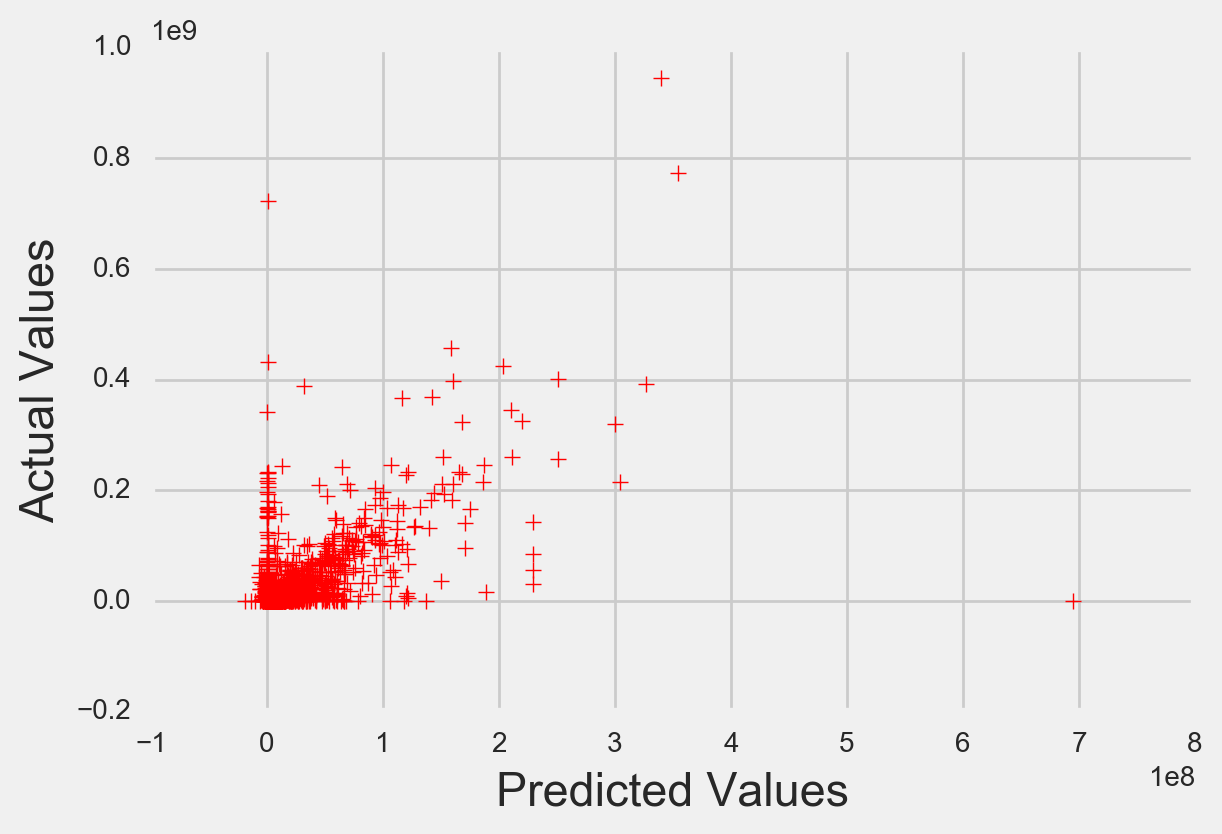

In [34]:
# 3. Construct a linear regression model.

#Fit the model and score
linreg = LinearRegression()

model        =  linreg.fit(Xn, y)
predictions  =  model.predict(Xn)
score        =  model.score(Xn, y)

print "R^2: ", score


plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.show()
###########################


In [35]:
#Using the test/train test to calculate R2
X_train, X_test, y_train, y_test = train_test_split(Xn, y, train_size=0.4)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
print predictions.shape

(82726, 13) (82726,)
(124090, 13) (124090,)
(206816,)


Score: 0.440778541588


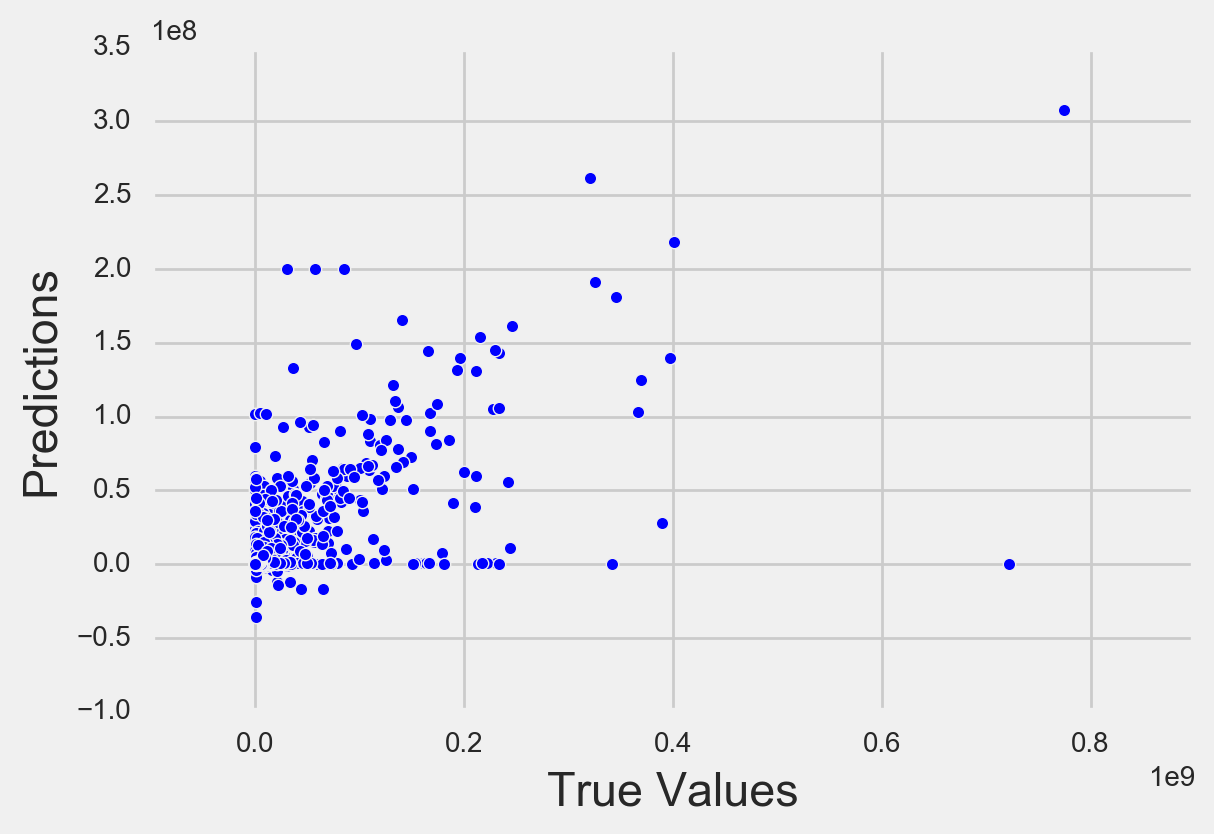

In [32]:
# Test/train Split:

model       = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)
score       = model.score(X_test, y_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", score

In [38]:
# Cross-validate the R2R2 of a linear regression model with 10 cross-validation folds.

linreg_scores = cross_val_score(linreg, Xn, y, cv=10)

linreg_predictions = cross_val_predict(linreg, Xn, y, cv=10)

linreg_accuracy = metrics.r2_score(y, linreg_predictions)

print "Cross-validation scores:", linreg_scores, np.mean(linreg_scores)

print "Cross-Predicted Accuracy:", linreg_accuracy

Cross-validation scores: [  5.83120705e-01   9.11304666e-02  -4.53954912e-02   1.04113400e-01
   7.09196417e-02  -1.52101944e-01   5.15044480e-01  -4.13138678e-01
  -5.64225602e+01   1.33328929e-01] -5.55355387309
Cross-Predicted Accuracy: 0.37773184358


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [39]:
# Hypothesis:  Group Fire Incidents by Day.  Predictors Day, Neighborhood, Zipcode

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [ ]:
# Hypothesis:  Predict Park score.  Predictors: Park Type, Park Size, Zip Code.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


In [40]:
# What biases are being caused here?
# ==> Want to target Users whose Friends will sign up and actually order food.
# 
# How would you measure the success of such a program? 
# ==>  You would measure Precision of getting new Customers that sign up and Uses the app. (True Positive).
# ==>  There will be a loss if a friend signs up but does not use the app (False Positive increases).  The cost
# ==>  of such a False Positive is "free order" cost
#
# Rephrase this question to be unbiased: Many people have said that there is a need
# for stricter laws on dangerous weapons. Do you agree? 
# ==> What are the results of the laws on dangerous weapons?  More safety, less crime?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?